In [40]:
#
Autopartes.data <- read.table(file = "http://tarwi.lamolina.edu.pe/~clopez/Regresion/Autopartes.txt", header = T)
attach(Autopartes.data)
head(Autopartes.data)


The following objects are masked from Autopartes.data (pos = 4):

    Region, X1, X2, X3, X4, X5, Y

The following objects are masked from Autopartes.data (pos = 5):

    Region, X1, X2, X3, X4, X5, Y



Region,Y,X1,X2,X3,X4,X5
1,37.702,1739,9.27,85.4,3.5,9
2,24.196,1221,5.86,60.7,5.0,5
3,32.055,1846,8.81,68.1,4.4,7
4,3.611,120,3.81,20.2,4.0,5
5,17.625,1096,10.31,33.8,3.5,7
6,45.919,2290,11.62,95.1,4.1,13


In [3]:
# se omite la linea 1
m1 <- lm(Y ~ X1 +X2 + X3 + X4 + X5, data = Autopartes.data[-1,])
# se calcula la linea 1
predict(m1, Autopartes.data[1,])


1 
36.78999

In [9]:
# e sombrero     =  Y    - Y sombrero
#           (1)       1           (1)
#
# e sombrero     =  37.702 - 36.789  = 0.91201
#          (1)      
#
37.702 - 36.78999

[1] 0.91201

In [4]:
# se omite la linea 2
m1 <- lm(Y ~ X1 +X2 + X3 + X4 + X5, data = Autopartes.data[-2,])
# se calcula la linea 1
predict(m1, Autopartes.data[2,])

2 
25.27784

In [6]:
# e sombrero     =  Y    - Y sombrero
#           (2)       2           (2)
#
# e sombrero     =  24.196 - 25.2778  = -1.0818
#          (2)      
#
24.196 - 25.2778

[1] -1.0818

In [11]:
## FORMA 1 : Calculo de los residuales directamente
m <- lm (Y ~ X1 +X2 + X3 + X4 + X5)
e <- resid(m)
hii <- hatvalues(m)

e/(1-hii)

1          2          3          4          5          6          7 
 0.9120119 -1.0818410  1.5457287  2.3364977 -2.2808788 -0.1351866 -4.4235761 
         8          9         10 
-3.1125439  3.7939991  2.1112807

In [12]:
# FORMA 2 : Calculo de los residuales directamente : residual PRESS
install.packages("qpcR")
library(qpcR)
a <- PRESS(m)
a$residuals

also installing the dependencies ‘cli’, ‘praise’, ‘testthat’, ‘processx’, ‘miniUI’, ‘webshot’, ‘crosstalk’, ‘manipulateWidget’, ‘minpack.lm’, ‘rgl’

Warning message in install.packages("qpcR"):
“installation of package ‘rgl’ had non-zero exit status”Warning message in install.packages("qpcR"):
“installation of package ‘qpcR’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(qpcR): there is no package called ‘qpcR’


In [44]:
Autopartes.m1 <- lm(Y ~ X1 + X2 + X3 + X4 + X5)
summary(Autopartes.m1)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5)

Residuals:
       1        2        3        4        5        6        7        8 
 0.51432 -0.45018  0.92579  0.47761 -0.69260 -0.07109 -1.49579 -1.30332 
       9       10 
 1.72442  0.37083 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.967e+01  5.422e+00  -3.628 0.022195 *  
X1          -6.286e-04  2.638e-03  -0.238 0.823391    
X2           1.740e+00  5.530e-01   3.146 0.034638 *  
X3           4.099e-01  4.385e-02   9.348 0.000729 ***
X4           2.036e+00  8.779e-01   2.319 0.081238 .  
X5          -3.445e-02  1.880e-01  -0.183 0.863534    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.507 on 4 degrees of freedom
Multiple R-squared:  0.9943,	Adjusted R-squared:  0.9872 
F-statistic: 140.4 on 5 and 4 DF,  p-value: 0.0001397


In [15]:
# Residuales estudentizados internamente
r <- rstandard(Autopartes.m1)
r

1           2           3           4           5           6 
 0.45446778 -0.46308538  0.79379212  0.70097528 -0.83401929 -0.06505347 
          7           8           9          10 
-1.70689129 -1.33649364  1.69728589  0.58714791

In [16]:
# Residuales estudentizados externamente
t <- rstudent(Autopartes.m1)
t

1           2           3           4           5           6 
 0.40415320 -0.41224661  0.74896114  0.64817804 -0.79467516 -0.05636778 
          7           8           9          10 
-2.83626760 -1.55582171  2.77880315  0.53192349

In [ ]:
# e sombrero    : La data participa de la estimación del modelo y del proceso de validación
#           i

# e sombrero     =  Y    - Y sombrero
#           i         i               i

# Validación Cruzada

#   2
#  R   =   


# Todos los residuales te permite calcular el valor de 

In [19]:
w <- runif(10)
 



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5, weights = c(1:10))

Coefficients:
(Intercept)           X1           X2           X3           X4           X5  
 -2.055e+01   -7.688e-04    1.803e+00    4.056e-01    2.090e+00    2.229e-03  


In [20]:
t <- rstudent(Autopartes.m1.p)
t

1          2          3          4          5          6          7 
 0.2147864  0.0162804  0.6869033  0.8558581 -0.6716476  0.1008107 -3.1951190 
         8          9         10 
-3.0474385  4.0561621  0.7388325

In [21]:
r <- rstandard(Autopartes.m1.p)
r

1           2           3           4           5           6 
 0.24612875  0.01879815  0.73730301  0.88599704 -0.72308943  0.11620949 
          7           8           9          10 
-1.75827010 -1.73877791  1.83932356  0.78471936

In [22]:
# MEDIDAS DE INFLUENCIA

dfbetas(Autopartes.m1)

,(Intercept),X1,X2,X3,X4,X5
1,0.04361874,-0.16056328,0.09416540,0.216999483,-0.11987021,-0.043257212
2,0.06602249,-0.11422548,0.09810761,-0.002419788,-0.24548562,0.227407045
3,-0.06410379,0.30251420,-0.13873534,-0.162024777,0.23437820,-0.217684602
4,0.98876658,0.02932507,-0.51888843,-0.161904051,-0.74585745,0.217553704
5,0.10723782,0.72633271,-0.84305787,-0.428776676,0.15994198,0.574219643
6,0.02297477,0.01165064,-0.01935056,-0.023387658,-0.01030045,0.003461916
7,-2.16567887,-1.95761805,2.60561299,1.532594082,2.14468151,-3.438758938
8,0.91881538,0.61311029,-0.61910496,-0.371707466,-1.14285436,0.414711746
9,-0.78284196,-0.80902269,0.40401105,0.522778664,0.56066346,1.254953341
10,0.22182428,0.62195667,-0.21705395,-0.878385703,-0.09721455,0.146111078


In [23]:
dffits(Autopartes.m1)

1           2           3           4           5           6 
 0.35538476 -0.48831817  0.61288459  1.27874978 -1.20340751 -0.05351954 
          7           8           9          10 
-3.96809904 -1.83308168  3.04422291  1.15236314

In [24]:
# COVRATIO
covratio(Autopartes.m1)

1            2            3            4            5            6 
 7.248507030  9.701107081  3.354221899 12.519724438  5.881099396 10.616199332 
           7            8            9           10 
 0.006674336  0.385612253  0.005932256 18.627131735

In [25]:
cooks.distance(Autopartes.m1)

1            2            3            4            5            6 
0.0266170850 0.0501490222 0.0703236080 0.3187400680 0.2658563866 0.0006358468 
           7            8            9           10 
0.9504539385 0.4132629963 0.5762302943 0.2696647438

In [52]:
influence.measures(Autopartes.m1)


Influence measures of
	 lm(formula = Y ~ X1 + X2 + X3 + X4 + X5) :

    dfb.1_  dfb.X1  dfb.X2   dfb.X3  dfb.X4   dfb.X5   dffit    cov.r   cook.d
1   0.0436 -0.1606  0.0942  0.21700 -0.1199 -0.04326  0.3554  7.24851 0.026617
2   0.0660 -0.1142  0.0981 -0.00242 -0.2455  0.22741 -0.4883  9.70111 0.050149
3  -0.0641  0.3025 -0.1387 -0.16202  0.2344 -0.21768  0.6129  3.35422 0.070324
4   0.9888  0.0293 -0.5189 -0.16190 -0.7459  0.21755  1.2787 12.51972 0.318740
5   0.1072  0.7263 -0.8431 -0.42878  0.1599  0.57422 -1.2034  5.88110 0.265856
6   0.0230  0.0117 -0.0194 -0.02339 -0.0103  0.00346 -0.0535 10.61620 0.000636
7  -2.1657 -1.9576  2.6056  1.53259  2.1447 -3.43876 -3.9681  0.00667 0.950454
8   0.9188  0.6131 -0.6191 -0.37171 -1.1429  0.41471 -1.8331  0.38561 0.413263
9  -0.7828 -0.8090  0.4040  0.52278  0.5607  1.25495  3.0442  0.00593 0.576230
10  0.2218  0.6220 -0.2171 -0.87839 -0.0972  0.14611  1.1524 18.62713 0.269665
     hat inf
1  0.436   *
2  0.584   *
3  0.401    
4  0.796   

In [ ]:
# la columna inf, nos indica que fila podrian tener un dato influencial

,StudRes,Hat,CookD
7,-2.8362676,0.6618605,0.9504539
10,0.5319235,0.8243556,0.2696647


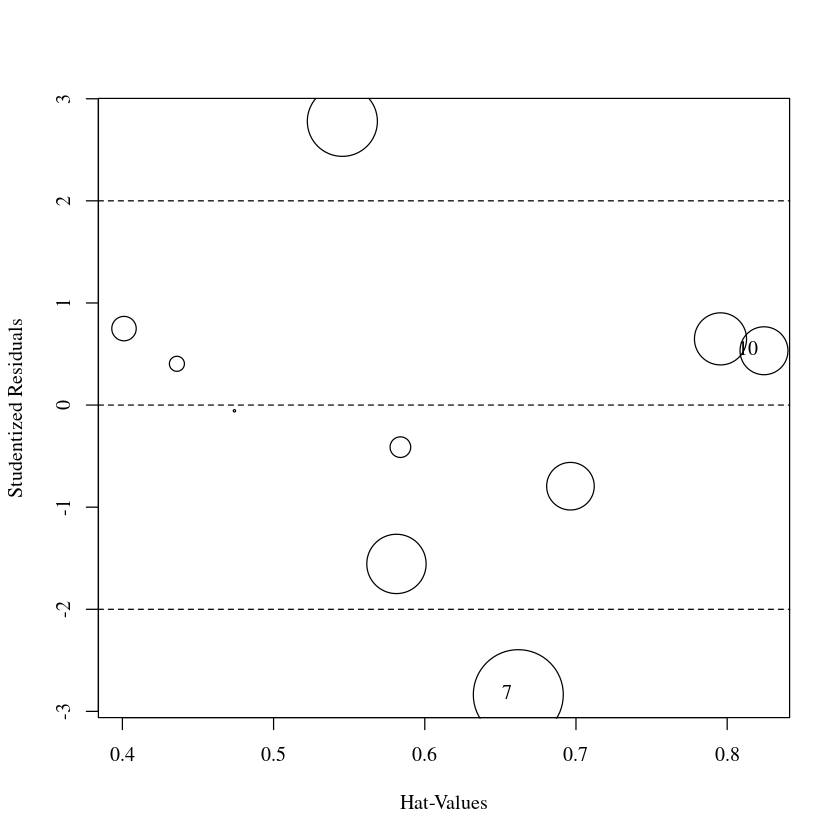

In [46]:
library(car)
influencePlot(Autopartes.m1)

In [29]:
# calculo de coeficientes
coef(Autopartes.m1)

(Intercept)            X1            X2            X3            X4 
-1.967151e+01 -6.286105e-04  1.739901e+00  4.099354e-01  2.035713e+00 
           X5 
-3.444617e-02

In [50]:
# se quita el dato 7 porque es un posible dato influencial
Autopartes.m7 <- lm(Y ~ X1 + X2 + X3 + X4 + X5, data=Autopartes.data[-7,])
coef(Autopartes.m7)

(Intercept)            X1            X2            X3            X4 
-12.605117663   0.002479706   0.872741986   0.369490277   0.902626029 
           X5 
  0.354614525

In [51]:
# se quita el dato 10 porque es un posible dato influencial
Autopartes.m10 <- lm(Y ~ X1 + X2 + X3 + X4 + X5, data=Autopartes.data[-10,])
coef(Autopartes.m10)

(Intercept)            X1            X2            X3            X4 
-20.999065993  -0.002439939   1.872395119   0.452452432   2.129916976 
           X5 
 -0.064766818

In [ ]:
# en RSTUDIO, Salen 4 datos influenciales, 4,7,9,10

In [57]:
# Para escoger a que dato debo seleccionar como influenciador es medir el cambio
# por ejemplo como cambia el coeficiente de regresion, etc...

# Reduzco peso en el dato 10 usando una ponderación modular
Autopartes.m1.p <- lm(Y ~ X1 + X2 + X3 + X4 + X5, weights=c(1,1,1,1,1,1,1,1,1,0.5))
coef(Autopartes.m1.p)


(Intercept)            X1            X2            X3            X4 
-1.986985e+01 -8.992277e-04  1.759696e+00  4.162875e-01  2.049787e+00 
           X5 
-3.897616e-02

(Intercept)            X1            X2            X3            X4 
-1.967151e+01 -6.286105e-04  1.739901e+00  4.099354e-01  2.035713e+00 
           X5 
-3.444617e-02